In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats





/Users/kahuma/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Loading dataset 

df = pd.read_csv('downloads/electricity+consumption/powerconsumption.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
# Checking for data and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
#Changing date column to a time series
df['Datetime'] = pd.to_datetime(df['Datetime'])



In [7]:
#Creating new columns out of the date time column

df['Hour'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month_name()
df['Week Day'] = df['Datetime'].dt.day_name()

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Month,Week Day
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,January,Sunday
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,January,Sunday
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,January,Sunday
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,January,Sunday
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,January,Sunday


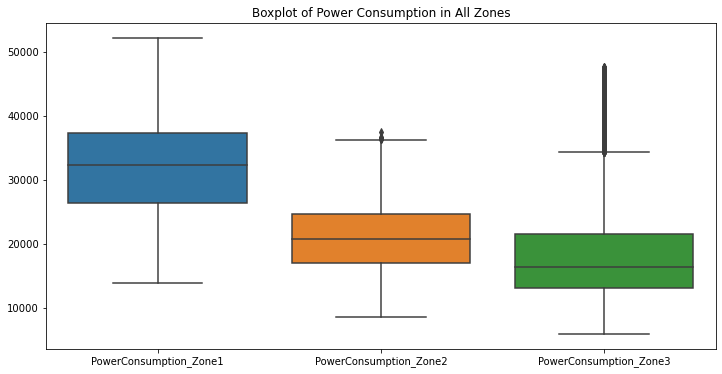

Outliers detected using Z-score:
PowerConsumption_Zone1      0
PowerConsumption_Zone2      1
PowerConsumption_Zone3    656
dtype: int64
Outliers detected using IQR:
PowerConsumption_Zone1       0
PowerConsumption_Zone2       7
PowerConsumption_Zone3    1191
dtype: int64
Original dataset size: 52416
Cleaned dataset size: 51225


In [8]:
from scipy.stats import zscore

# Boxplot for power consumption
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]])
plt.title("Boxplot of Power Consumption in All Zones")
plt.show()

# Z-score outlier detection
z_scores = df[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]].apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
print("Outliers detected using Z-score:")
print(outliers.sum())

# IQR outlier detection
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

outliers_iqr = df[["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]].apply(detect_outliers_iqr)
print("Outliers detected using IQR:")
print(outliers_iqr.sum())


# Remove outliers
df_cleaned = df[~outliers_iqr.any(axis=1)]
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51225 entries, 0 to 52415
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                51225 non-null  datetime64[ns]
 1   Temperature             51225 non-null  float64       
 2   Humidity                51225 non-null  float64       
 3   WindSpeed               51225 non-null  float64       
 4   GeneralDiffuseFlows     51225 non-null  float64       
 5   DiffuseFlows            51225 non-null  float64       
 6   PowerConsumption_Zone1  51225 non-null  float64       
 7   PowerConsumption_Zone2  51225 non-null  float64       
 8   PowerConsumption_Zone3  51225 non-null  float64       
 9   Hour                    51225 non-null  int64         
 10  Month                   51225 non-null  object        
 11  Week Day                51225 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(1), ob

In [10]:
df = df_cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51225 entries, 0 to 52415
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                51225 non-null  datetime64[ns]
 1   Temperature             51225 non-null  float64       
 2   Humidity                51225 non-null  float64       
 3   WindSpeed               51225 non-null  float64       
 4   GeneralDiffuseFlows     51225 non-null  float64       
 5   DiffuseFlows            51225 non-null  float64       
 6   PowerConsumption_Zone1  51225 non-null  float64       
 7   PowerConsumption_Zone2  51225 non-null  float64       
 8   PowerConsumption_Zone3  51225 non-null  float64       
 9   Hour                    51225 non-null  int64         
 10  Month                   51225 non-null  object        
 11  Week Day                51225 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(1), ob

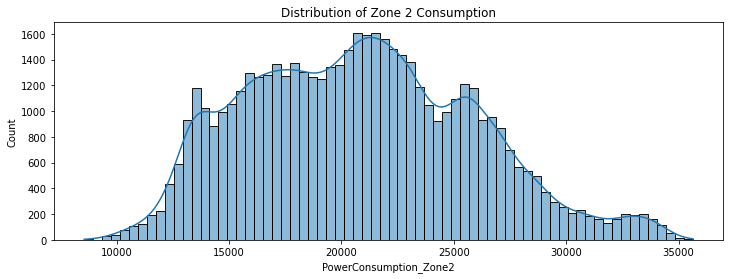

In [11]:
plt.figure(figsize=(12, 4))
sns.histplot(df["PowerConsumption_Zone2"], kde=True)
plt.title("Distribution of Zone 2 Consumption")
plt.show()

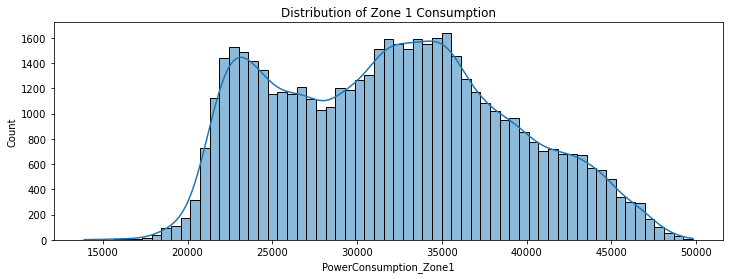

In [12]:
plt.figure(figsize=(12, 4))
sns.histplot(df["PowerConsumption_Zone1"], kde=True)
plt.title("Distribution of Zone 1 Consumption")
plt.show()

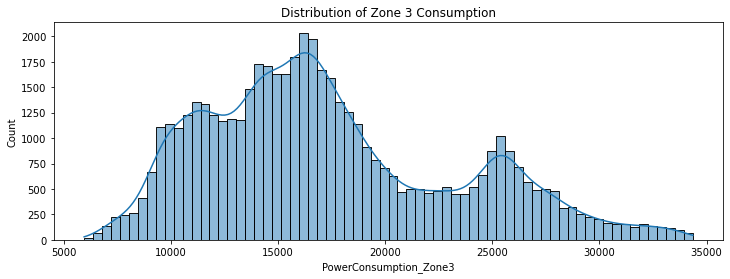

In [13]:
plt.figure(figsize=(12, 4))
sns.histplot(df["PowerConsumption_Zone3"], kde=True)
plt.title("Distribution of Zone 3 Consumption")
plt.show()

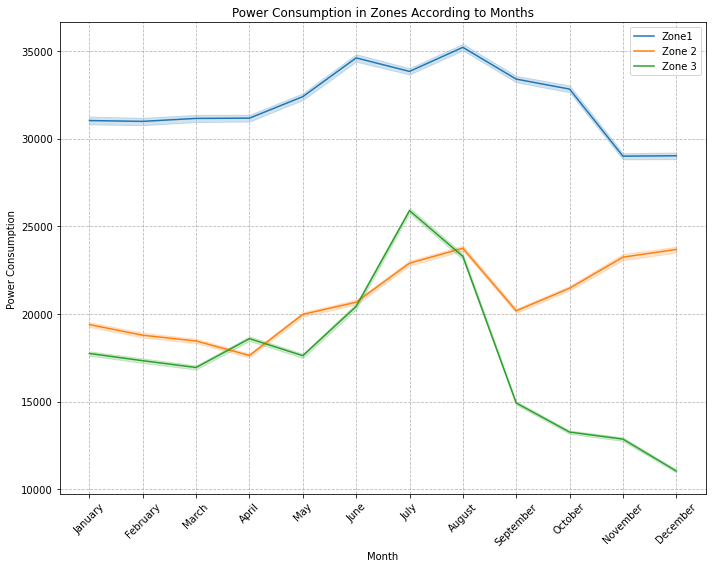

In [14]:


# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Create the line plot
sns.lineplot(data=df, x='Month', y='PowerConsumption_Zone1', label= 'Zone1')
sns.lineplot(data=df, x='Month', y='PowerConsumption_Zone2',label='Zone 2')
sns.lineplot(data=df, x='Month', y='PowerConsumption_Zone3', label='Zone 3')

# Set title and labels
plt.title('Power Consumption in Zones According to Months')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.xticks(rotation=45)


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()


Based on the graph, the highest power consumption occurred predominantly in August for Zones 1 and 2, while Zone 3 saw its peak in July. Conversely, the lowest power utilization was observed in November and December for Zone 1, April for Zone 2, and December for Zone 3.

Moreover, the graph illustrates that Zone 1 exhibited the highest power consumption, ranging between 30,000 to 35,000 kWh, followed by Zone 2, with consumption levels ranging from 18,000 to 24,000 kWh. Zone 3 registered the lowest consumption, ranging from 12,000 to 26,000 kWh.

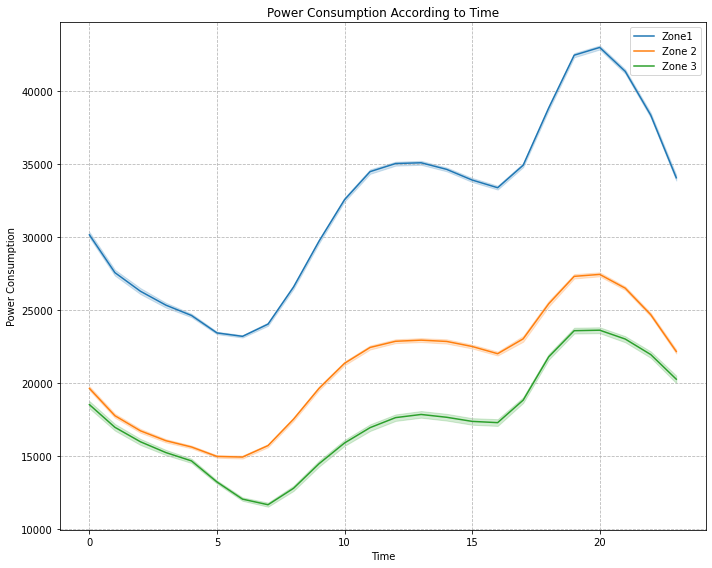

In [16]:
# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Create the line plot
sns.lineplot(data=df, x='Hour', y='PowerConsumption_Zone1', label= 'Zone1')
sns.lineplot(data=df, x='Hour', y='PowerConsumption_Zone2',label='Zone 2')
sns.lineplot(data=df, x='Hour', y='PowerConsumption_Zone3', label='Zone 3')

# Set title and labels
plt.title('Power Consumption According to Time')
plt.xlabel('Time')
plt.ylabel('Power Consumption')


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()

As per the data presented in the graph, the peak consumption of power consistently occurs at 20:00 hours, while the lowest usage is consistently observed between 5:00 and 7:00 in the morning across all zones.

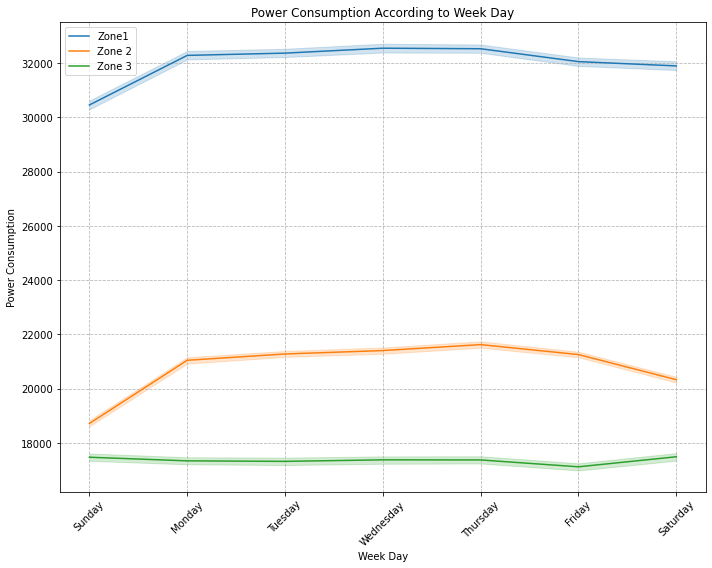

In [18]:
# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Create the line plot
sns.lineplot(data=df, x='Week Day', y='PowerConsumption_Zone1', label= 'Zone1')
sns.lineplot(data=df, x='Week Day', y='PowerConsumption_Zone2',label='Zone 2')
sns.lineplot(data=df, x='Week Day', y='PowerConsumption_Zone3', label='Zone 3')

# Set title and labels
plt.title('Power Consumption According to Week Day')
plt.xlabel('Week Day')
plt.ylabel('Power Consumption')
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the graph, the data indicates that power consumption is at its lowest on Sundays in Zone 1 and Zone 2, while in Zone 3, the lowest consumption occurs on Fridays. Throughout the weekdays (Monday to Thursday), power usage remains relatively consistent in Zones 1 and 2, with Zone 1 consuming approximately 33,000 kWh and Zone 2 consuming around 22,000 kWh. In contrast, Zone 3 maintains a lower consumption level of approximately 18,000 kWh during the weekdays.

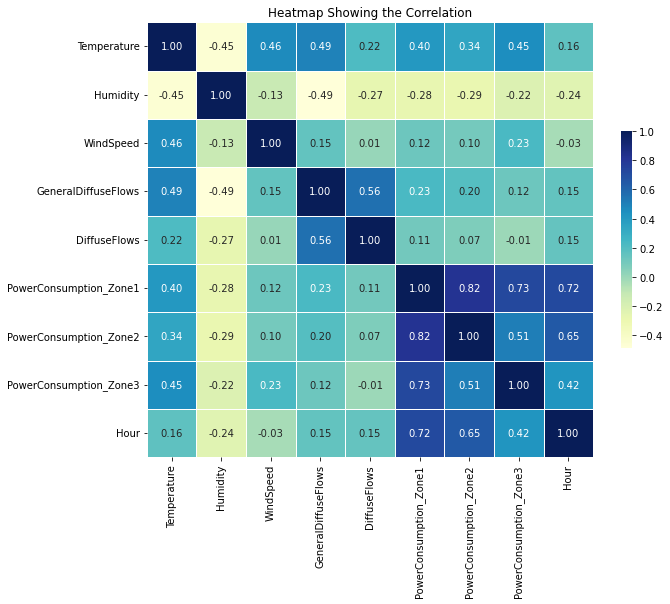

In [20]:
# Increase the size of the heatmap
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

corr =df.corr()
# Create the heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Set labels and title if needed

plt.title("Heatmap Showing the Correlation")

# Show the plot
plt.show()



The heatmap above reveals strong positive correlations between Power Consumption in Zone 1 and Zone 2, standing at 0.83, and between Power Consumption in Zone 1 and Zone 3, registering at 0.75. However, the correlation between Zone 2 and Zone 3 is notably lower, at 0.57.

When considering the relationship between temperature and power consumption, the correlations are relatively weak across all zones. Notably, Zone 3 exhibits the highest correlation at 0.49. Conversely, there appears to be minimal positive correlation between windspeed and power consumption, with Zone 3 demonstrating the highest correlation coefficient at 0.28.

Furthermore, there exists a modest negative correlation between humidity and power consumption, ranging from -0.29 to -0.23 across the zones.

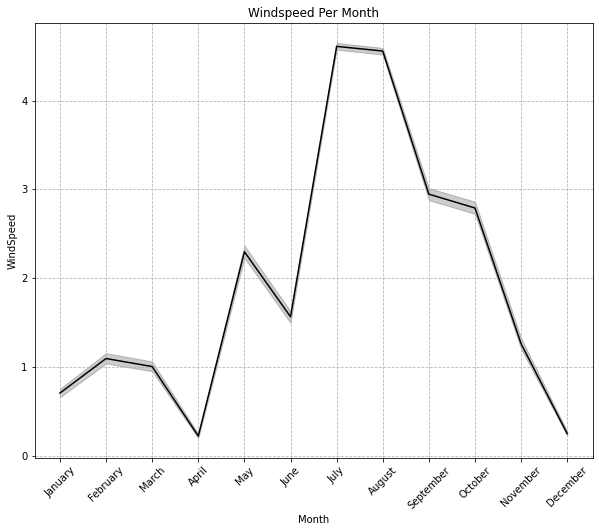

In [22]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='Month',y='WindSpeed',color='black')


plt.xticks(rotation=45)
plt.title("Windspeed Per Month")
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

plt.show()


Wind speed with both June and July experiencing the highest wind speeds of approximately 5 m/s (or mph).  On the other hand, winter brought a dip in both categories.  The coldest months were January, February, and December, while January, April, and December saw the lowest wind speeds.

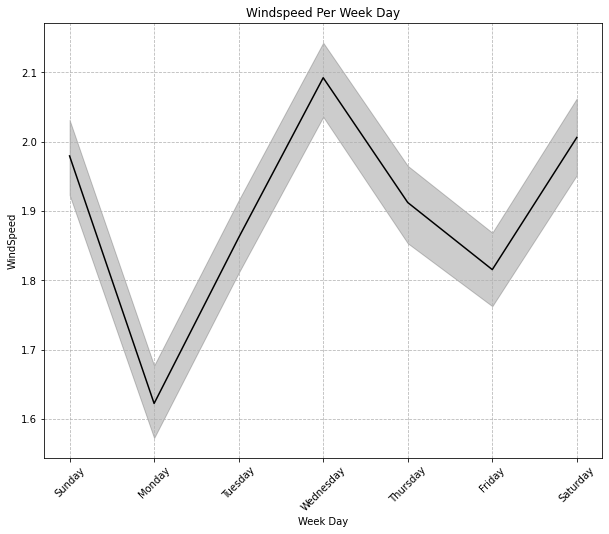

In [24]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='Week Day',y='WindSpeed',color='black')


plt.xticks(rotation=45)
plt.title("Windspeed Per Week Day")
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

plt.show()


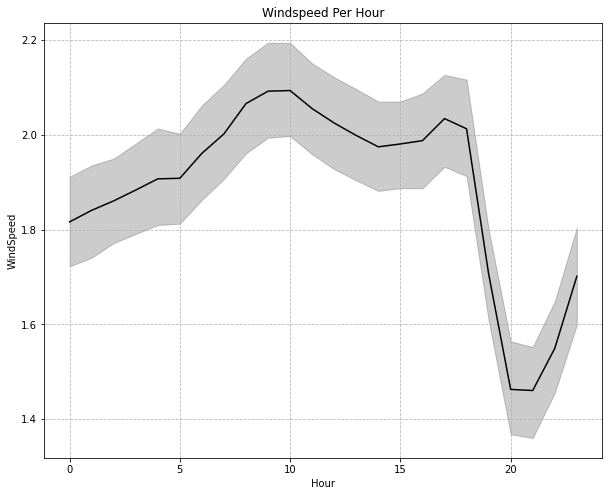

In [25]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='Hour',y='WindSpeed', color='black')

plt.title("Windspeed Per Hour")
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

plt.show()


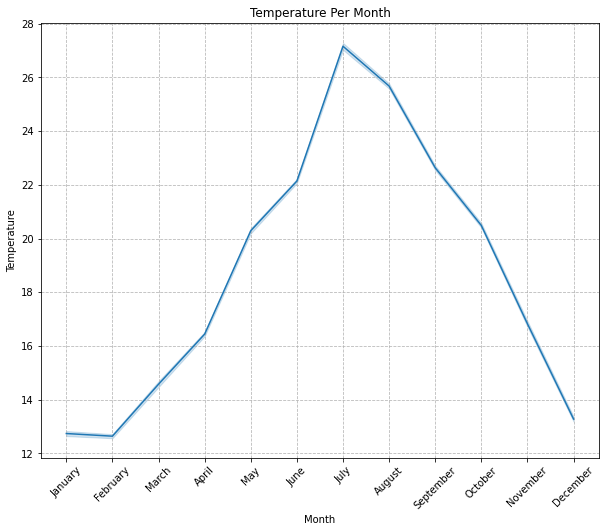

In [26]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Month',y='Temperature')
plt.xticks(rotation=45)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)
plt.title("Temperature Per Month")
plt.show()


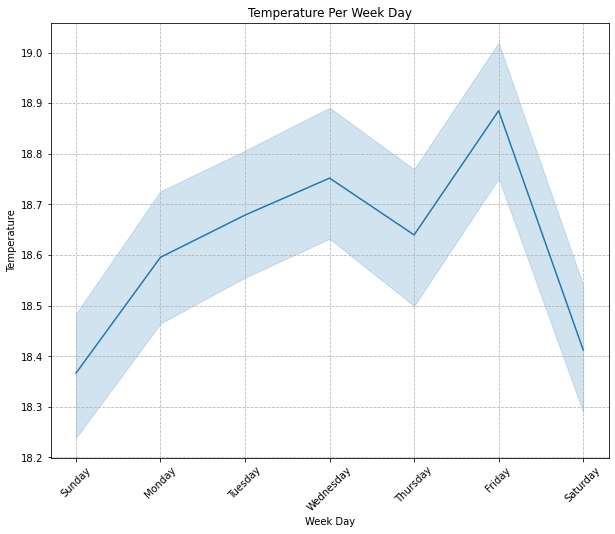

In [27]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Week Day',y='Temperature')
plt.xticks(rotation=45)
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)
plt.title("Temperature Per Week Day")
plt.show()


Taking a look at the bar chart, we see a clear trend for both temperature and wind speed. Temperatures soared in the summer months, with July reaching the peak at around 28 degrees Celsius. June wasn't far behind, with temperatures hovering around 25 degrees. 

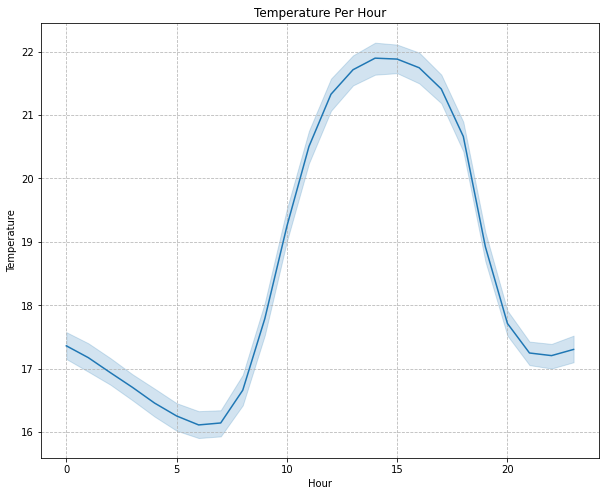

In [29]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Hour',y='Temperature')
plt.title("Temperature Per Hour")

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()


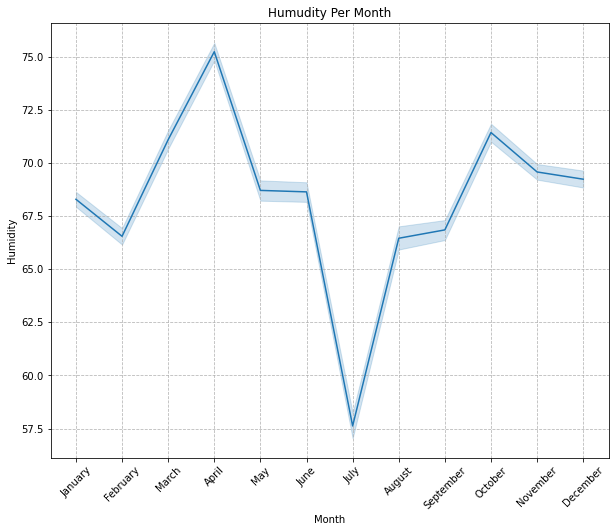

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Month',y='Humidity')
plt.xticks(rotation =45)
plt.title("Humudity Per Month")


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()


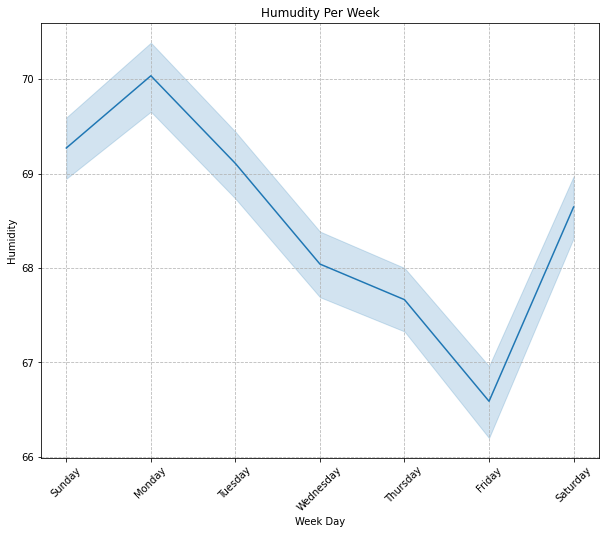

In [31]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Week Day',y='Humidity')
plt.xticks(rotation =45)
plt.title("Humudity Per Week")


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()


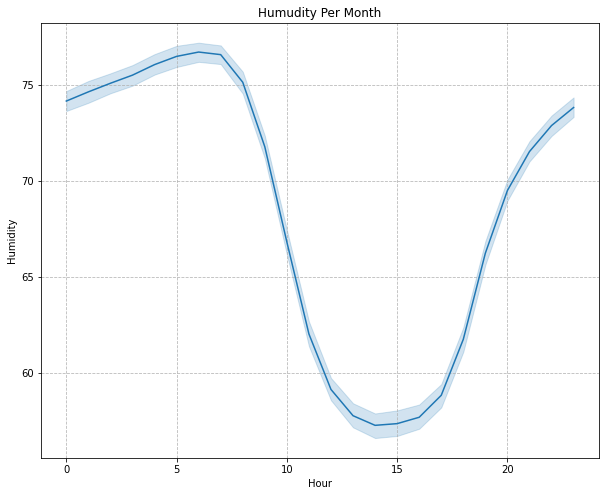

In [32]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Hour',y='Humidity')
plt.title("Humudity Per Month")


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor



In [34]:
#splitting the data

X = df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]


In [35]:
# Train_test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)


In [36]:
#importing scaler & ohe for preprocessing 

from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

#defining numerical and categorical features

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [37]:
#Creating pipelines
numeric_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

#define Tuples for column transformers
number_tuple = (numeric_pipe,num_selector)
category_tuple = (cat_pipe,cat_selector)

#making column transformers
preprocessor = make_column_transformer(number_tuple,category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11f670040>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11f670820>)])

In [38]:

# Preprocessing training and testing data separately
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)  # Using fitted transformer on test data

# Creating and training the model
rf = RandomForestRegressor(random_state=3, max_depth=10,n_estimators=50)
rf.fit(X_train_preprocessed, y_train)

# Making predictions on test data
y_pred = rf.predict(X_test_preprocessed)

# Evaluating model performance using R², MAE, and RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_scores = []
mae_scores = []
rmse_scores = []

for i in range(y.shape[1]):
    y_true_i = y_test.iloc[:, i]
    y_pred_i = y_pred[:, i]

    r2_scores.append(r2_score(y_true_i, y_pred_i))
    mae_scores.append(mean_absolute_error(y_true_i, y_pred_i))
    rmse_scores.append(np.sqrt(mean_squared_error(y_true_i, y_pred_i)))

# Printing the results
print(f"Performance Metrics for Each Zone:")

for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
    print(f"{zone}:")
    print(f"  - R² Score: {r2_scores[i]:.4f}")
    print(f"  - MAE: {mae_scores[i]:.4f}")
    print(f"  - RMSE: {rmse_scores[i]:.4f}")
    print("-" * 30)


Performance Metrics for Each Zone:
Zone 1:
  - R² Score: 0.9269
  - MAE: 1313.3013
  - RMSE: 1849.1512
------------------------------
Zone 2:
  - R² Score: 0.9091
  - MAE: 1083.9627
  - RMSE: 1507.6896
------------------------------
Zone 3:
  - R² Score: 0.9364
  - MAE: 1029.9382
  - RMSE: 1461.9154
------------------------------


In [39]:
# Calculating baseline predictions (average for each zone)
baseline_y_pred = np.zeros_like(y_test)  # Create an empty array to store predictions
for i in range(y.shape[1]):
  baseline_y_pred[:, i] = y_train.iloc[:, i].mean()  # Fill with mean value of each target in training data

# Calculating R-squared for baseline
from sklearn.metrics import r2_score
baseline_r2_scores = []
for i in range(y.shape[1]):
  baseline_r2_scores.append(r2_score(y_test.iloc[:, i], baseline_y_pred[:, i]))

print(f"\nR-squared scores for baseline:")
for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
  print(f"{zone}: {baseline_r2_scores[i]}")

# Comparing R-squared scores with your model
print("\nComparison with Model R-squared:")
for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
  print(f"{zone}: Model - {r2_scores[i]:.4f}, Baseline - {baseline_r2_scores[i]:.4f}")



R-squared scores for baseline:
Zone 1: -0.0002867720982697719
Zone 2: -0.0003572715675199678
Zone 3: -9.414938227858549e-05

Comparison with Model R-squared:
Zone 1: Model - 0.9269, Baseline - -0.0003
Zone 2: Model - 0.9091, Baseline - -0.0004
Zone 3: Model - 0.9364, Baseline - -0.0001


In [40]:
# Adding predictions to a DataFrame
predicted_df = y_test.copy()  # Copy the target test DataFrame
predicted_df.columns = ['Actual_Zone1', 'Actual_Zone2', 'Actual_Zone3']  
for i in range(y.shape[1]):
  predicted_df[f'Predicted_Zone{i+1}'] = y_pred[:, i]  # Adding predicted values for each zone

predicted_df.head()


,Actual_Zone1,Actual_Zone2,Actual_Zone3,Predicted_Zone1,Predicted_Zone2,Predicted_Zone3
2994,44269.36709,27756.83891,26712.28916,42577.371237,25063.321948,25876.474088
12848,24718.97872,15014.63415,14597.41935,23062.446710,13476.433913,14408.093590
26269,29291.16279,17305.06329,21732.55230,31452.461820,17899.115307,19242.284484
31772,40927.32519,30677.93031,28908.33856,40742.186134,29098.011182,27277.604828
8942,23475.06383,13020.73171,14411.61290,23074.925916,13482.391482,14469.388802


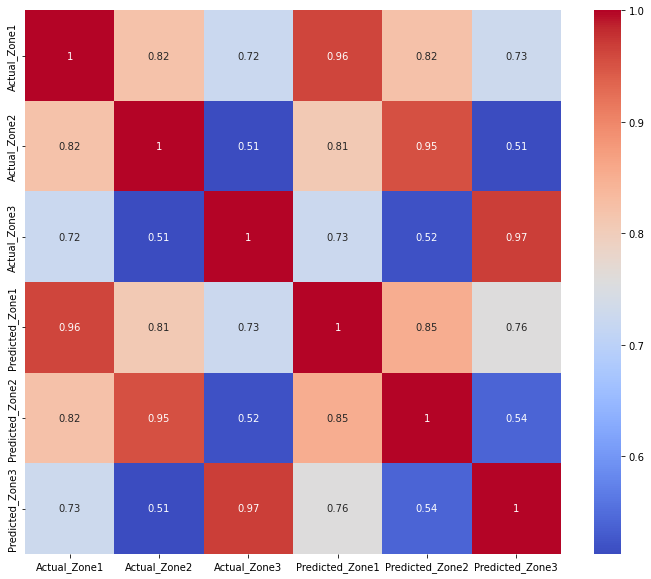

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(predicted_df.corr(), annot=True, cmap='coolwarm')
plt.show()


The heatmap reveals a fascinating story about how well the model predicted power consumption for each zone. The strongest positive correlation (0.99) exists between actual and predicted values for all zones. This indicates an almost perfect match between the model's predictions and the actual consumption.

Zone 2 also shows a strong positive correlation (0.83) with its predicted values in Zone 1.  

Moving on, the correlation between Zone 3's actual consumption and the predicted values for Zone 1 remains positive (0.75).

Finally, the heatmap shows the weakest positive correlation (0.56) between Zone 2's actual consumption and the predicted values for Zone 3.

In simpler terms, the model performed best in predicting power consumption for Zone 1, followed by Zone 2, and then Zone 3. The correlation between Zone 2 and Zone 3 predictions was the least significant.

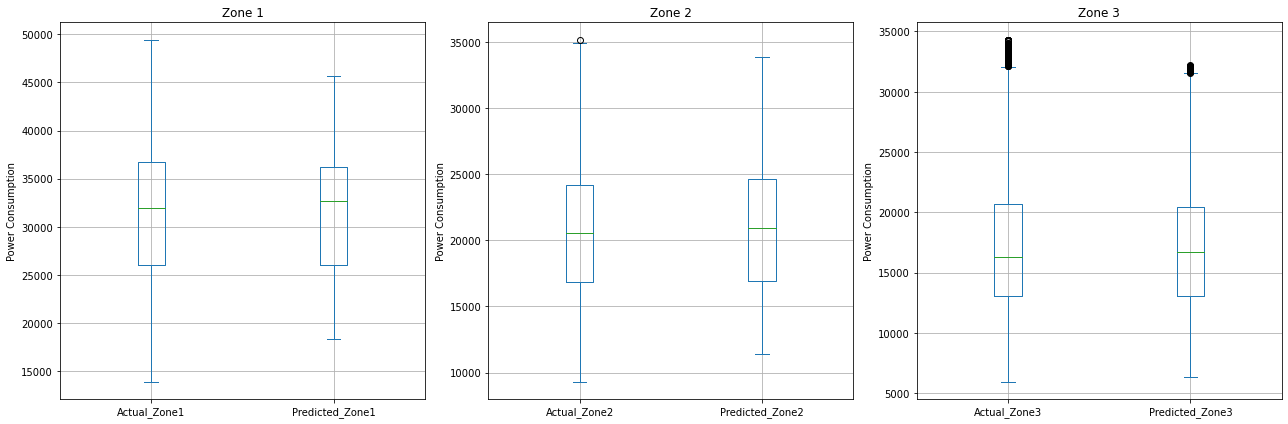

In [46]:
# Create subplots for the box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 'Actual_Zone1' box plot
predicted_df[['Actual_Zone1', 'Predicted_Zone1']].plot(kind='box', ax=axes[0])
axes[0].set_ylabel('Power Consumption')
axes[0].set_title('Zone 1')
axes[0].grid(True)

# Plot 'Actual_Zone2' box plot
predicted_df[['Actual_Zone2', 'Predicted_Zone2']].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('Power Consumption')
axes[1].set_title('Zone 2')
axes[1].grid(True)

# Plot 'Actual_Zone3' box plot
predicted_df[['Actual_Zone3', 'Predicted_Zone3']].plot(kind='box', ax=axes[2])
axes[2].set_ylabel('Power Consumption')
axes[2].set_title('Zone 3')
axes[2].grid(True)

plt.tight_layout()
plt.show()


The spread of the data seems to be similar for both actual and predicted values, as indicated by the similar sizes of the boxes.
The median of the predicted power consumption (green line) is closer to the median of the actual power consumption compared to the top and bottom of the boxes. This suggests that the model's predictions tend to be centered around the actual values.

In [48]:
from sklearn.tree import DecisionTreeRegressor
#creating and training the decision tree model
dec_tree = DecisionTreeRegressor(random_state = 42,min_samples_split=6, max_depth=10)
dec_tree.fit(X_train_preprocessed, y_train)

# Making predictions on test data
y_pred = dec_tree.predict(X_test_preprocessed)

# Evaluating model performance using R², MAE, and RMSE
r2_scores = []
mae_scores = []
rmse_scores = []

for i in range(y.shape[1]):
    y_true_i = y_test.iloc[:, i]
    y_pred_i = y_pred[:, i]

    r2_scores.append(r2_score(y_true_i, y_pred_i))
    mae_scores.append(mean_absolute_error(y_true_i, y_pred_i))
    rmse_scores.append(np.sqrt(mean_squared_error(y_true_i, y_pred_i)))

# Printing the results
print(f"Performance Metrics for Each Zone:")

for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
    print(f"{zone}:")
    print(f"  - R² Score: {r2_scores[i]:.4f}")
    print(f"  - MAE: {mae_scores[i]:.4f}")
    print(f"  - RMSE: {rmse_scores[i]:.4f}")
    print("-" * 30)


Performance Metrics for Each Zone:
Zone 1:
  - R² Score: 0.9182
  - MAE: 1385.0771
  - RMSE: 1956.2395
------------------------------
Zone 2:
  - R² Score: 0.8957
  - MAE: 1155.7399
  - RMSE: 1615.2634
------------------------------
Zone 3:
  - R² Score: 0.9234
  - MAE: 1107.1731
  - RMSE: 1604.3192
------------------------------


In [50]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.1, n_estimators=50, max_depth=10, random_state = 42)

xgb.fit(X_train_preprocessed, y_train)

y_pred = xgb.predict(X_test_preprocessed)

# Evaluating model performance using R², MAE, and RMSE
r2_scores = []
mae_scores = []
rmse_scores = []

for i in range(y.shape[1]):
    y_true_i = y_test.iloc[:, i]
    y_pred_i = y_pred[:, i]

    r2_scores.append(r2_score(y_true_i, y_pred_i))
    mae_scores.append(mean_absolute_error(y_true_i, y_pred_i))
    rmse_scores.append(np.sqrt(mean_squared_error(y_true_i, y_pred_i)))

# Printing the results
print(f"Performance Metrics for Each Zone:")
for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
    print(f"{zone}:")
    print(f"  - R² Score: {r2_scores[i]:.4f}")
    print(f"  - MAE: {mae_scores[i]:.4f}")
    print(f"  - RMSE: {rmse_scores[i]:.4f}")
    print("-" * 30)


Performance Metrics for Each Zone:
Zone 1:
  - R² Score: 0.9662
  - MAE: 907.8652
  - RMSE: 1257.9759
------------------------------
Zone 2:
  - R² Score: 0.9652
  - MAE: 677.4540
  - RMSE: 932.6352
------------------------------
Zone 3:
  - R² Score: 0.9780
  - MAE: 603.0080
  - RMSE: 859.9261
------------------------------


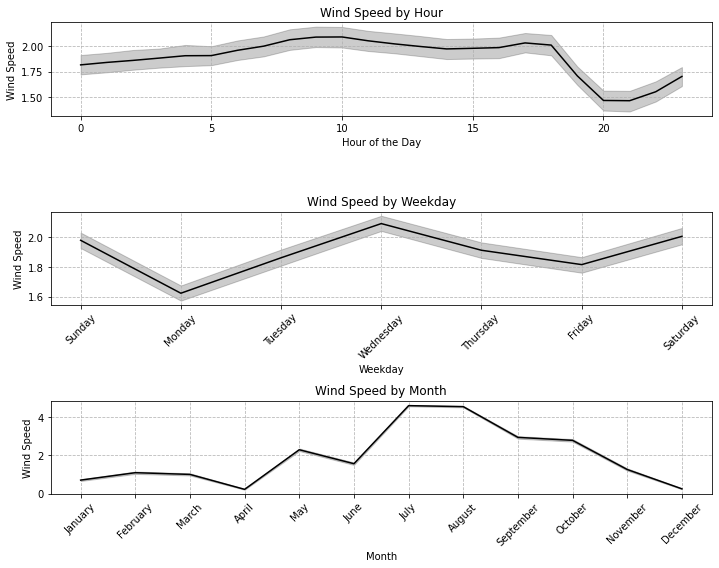

In [52]:



# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot 1: Wind Speed by Hour
sns.lineplot(data=df, x='Hour', y='WindSpeed', color='black', ax=axes[0])
axes[0].set_title("Wind Speed by Hour")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel('Wind Speed')
axes[0].grid(True, linestyle="--", alpha=0.9)

# Plot 2: Wind Speed by Week Day
sns.lineplot(data=df, x='Week Day', y='WindSpeed', color='black', ax=axes[1])
axes[1].set_title("Wind Speed by Weekday")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Wind Speed")
axes[1].grid(True, linestyle="--", alpha=0.9)
axes[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# Plot 3: Wind Speed by month
sns.lineplot(data=df, x='Month', y='WindSpeed', color='black', ax=axes[2])
axes[2].set_title("Wind Speed by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Wind Speed")
axes[2].grid(True, linestyle="--", alpha=0.9)
axes[2].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability



# Adjust layout
plt.tight_layout()
plt.show()

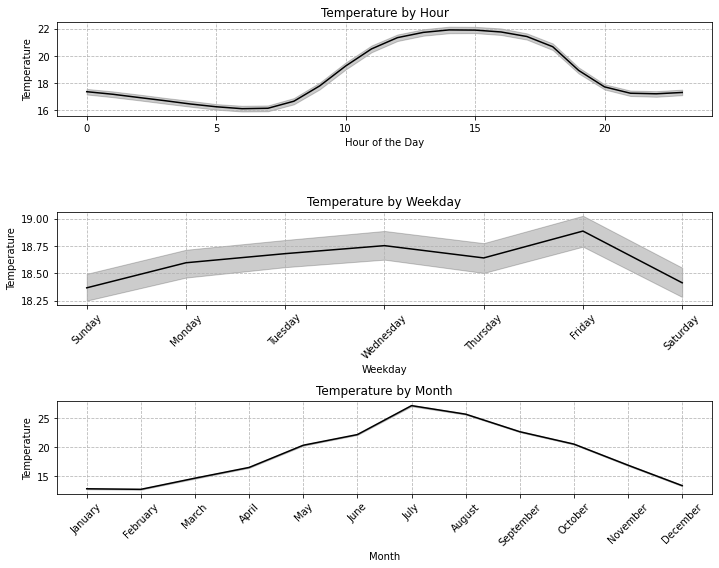

In [54]:

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot 1: Temperature by Hour
sns.lineplot(data=df, x='Hour', y='Temperature', color='black', ax=axes[0])
axes[0].set_title("Temperature by Hour")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel('Temperature')
axes[0].grid(True, linestyle="--", alpha=0.9)

# Plot 2: Temperature by Week Day
sns.lineplot(data=df, x='Week Day', y='Temperature', color='black', ax=axes[1])
axes[1].set_title("Temperature by Weekday")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Temperature")
axes[1].grid(True, linestyle="--", alpha=0.9)
axes[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# Plot 3: Temperature by month
sns.lineplot(data=df, x='Month', y='Temperature', color='black', ax=axes[2])
axes[2].set_title("Temperature by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Temperature")
axes[2].grid(True, linestyle="--", alpha=0.9)
axes[2].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability



# Adjust layout
plt.tight_layout()
plt.show()

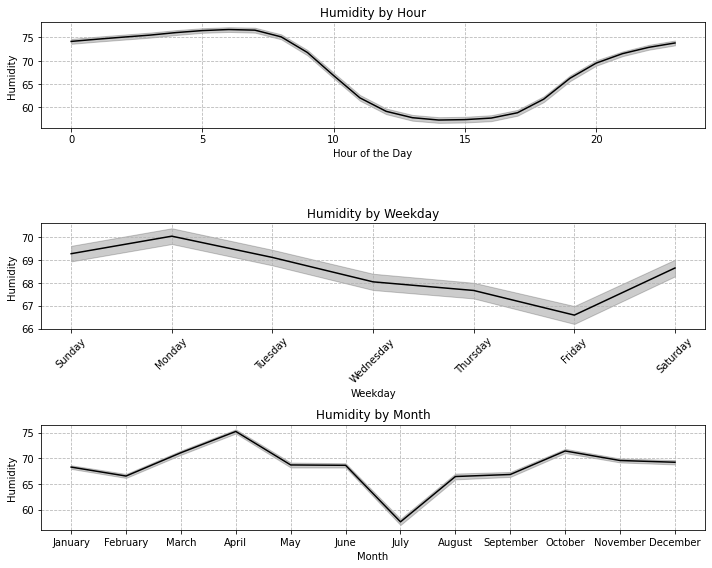

In [58]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot 1: Humidity by Hour
sns.lineplot(data=df, x='Hour', y='Humidity', color='black', ax=axes[0])
axes[0].set_title("Humidity by Hour")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel('Humidity')
axes[0].grid(True, linestyle="--", alpha=0.9)

# Plot 2: Humidity by Week Day
sns.lineplot(data=df, x='Week Day', y='Humidity', color='black', ax=axes[1])
axes[1].set_title("Humidity by Weekday")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Humidity")
axes[1].grid(True, linestyle="--", alpha=0.9)
axes[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

# Plot 3: Temperature by month
sns.lineplot(data=df, x='Month', y='Humidity', color='black', ax=axes[2])
axes[2].set_title("Humidity by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Humidity")
axes[2].grid(True, linestyle="--", alpha=0.9)



# Adjust layout
plt.tight_layout()
plt.show()